<i>Copyright (c) Microsoft Corporation. All rights reserved.</i>

<i>Licensed under the MIT License.</i>

# Testing different Hyperparameters and Benchmarking

In this notebook, we'll cover how to test different hyperparameters for a particular dataset and how to benchmark different parameters across a group of datasets.

## Table of Contents

* [Testing parameter](#hyperparam)
  * [Using Python](#python)
  * [Using the CLI](#cli)
  * [Visualizing the results](#visualize)

---

## Testing hyperparameters  <a name="hyperparam"></a>

Lets say we want to learn more about __how different learning rates and different image sizes affect our model's accuracy when restricted to 10 epochs__, and we want to build an experiment to test out these hyperparameters. We also want to try these parameters out on two different variations of the dataset - one where the images are kept raw (maybe there is a watermark on the image) and one where the images have been altered (the same dataset where there was some attempt to remove the watermark).

In this notebook, we'll walk through how we use the Parameter Sweeper module with the following:

- use python to perform this experiment
- use the CLI to perform this experiment
- evalute the results using Pandas

Check out fastai version.

In [1]:
import fastai
fastai.__version__

'1.0.47'

Ensure edits to libraries are loaded and plotting is shown in the notebook.

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

We start by importing the utilities we need.

In [3]:
import sys
sys.path.append("../../")
from utils_cv.classification.data import Urls
from utils_cv.common.data import unzip_url
from utils_cv.classification.parameter_sweeper import *

To use the Parameter Sweeper tool for single label classification, we'll need to make sure that the data is stored such that images are sorted into their classes inside of a subfolder. In this notebook, we'll use the Fridge Objects dataset, which is already stored in the correct format. We also want to use the Fridge Objects Watermarked dataset. We want to see whether the original images (which are watermarked) will perform just as well as the non-watermarked images.

Define some parameters we will use in this notebook

In [4]:
DATA = [unzip_url(Urls.fridge_objects_path, exist_ok=True), unzip_url(Urls.fridge_objects_watermark_path, exist_ok=True)]
REPS = 3
LEARNING_RATES = [1e-3, 1e-4, 1e-5]
IM_SIZES = [299, 499]
EPOCHS = [10]

### Using Python <a name="python"></a>

We start by creating the Parameter Sweeper object:

In [5]:
sweeper = ParameterSweeper()

Before we start testing, it's a good idea to see what the default parameters Are. We can use a the property `parameters` to easily see those default values.

In [6]:
sweeper.parameters

OrderedDict([('learning_rate', [0.0001]),
             ('epochs', [15]),
             ('batch_size', [16]),
             ('im_size', [299]),
             ('architecture',
              [<Architecture.resnet18: functools.partial(<function resnet18 at 0x7f5fedea1158>)>]),
             ('transform', [True]),
             ('dropout', [0.5]),
             ('weight_decay', [0.01]),
             ('training_schedule',
              [<TrainingSchedule.head_first_then_body: 'head_first_then_body'>]),
             ('discriminative_lr', [False]),
             ('one_cycle_policy', [True])])

Now that we know the defaults, we can pass it the parameters we want to test. 

In this notebook, we want to see the effect of different learning rates across different image sizes using only 10 epochs (the default number of epochs is 15). To do so, I would run the `update_parameters` functions as follows:

```python
sweeper.update_parameters(learning_rate=[1e-3, 1e-4, 1e-5], im_size=[299, 499], epochs=[10])
```

Notice that all parameters must be passed in as a list, including single values such the number of epochs.

These parameters will be used to calculate the number of permutations to run. In this case, we've pass in three options for learning rates, two for image sizes, and one for number of epochs. This will result in 3 X 2 X 1 total permutations (in otherwords, 6 permutations). 

In [7]:
sweeper.update_parameters(learning_rate=LEARNING_RATES, im_size=IM_SIZES, epochs=EPOCHS)

Now that we have our parameters defined, we call the `run()` function with the dataset to test on. We can also optionally pass in:
- the number of repetitions to run each permutation (default is 3)
- whether or not we want the training to stop early if the metric (accuracy) doesn't improve by 0.01 (1%) over 3 epochs (default is False)

The `run` function returns a multi-index dataframe which we can work with right away.

In [8]:
df = sweeper.run(datasets=DATA, reps=REPS); df

this Learner object self-destroyed - it still exists, but no longer usable


duration  \
0 PARAMETERS [learning_rate: 0.0001]|[epochs: 10]... fridgeObjects           15.788061   
                                                     fridgeObjectsWatermark  15.777328   
  PARAMETERS [learning_rate: 0.0001]|[epochs: 10]... fridgeObjects           23.030190   
                                                     fridgeObjectsWatermark  23.214088   
  PARAMETERS [learning_rate: 0.001]|[epochs: 10]|... fridgeObjects           19.671177   
                                                     fridgeObjectsWatermark  15.369383   
  PARAMETERS [learning_rate: 0.001]|[epochs: 10]|... fridgeObjects           23.603302   
                                                     fridgeObjectsWatermark  23.248507   
  PARAMETERS [learning_rate: 1e-05]|[epochs: 10]|... fridgeObjects           15.907091   
                                                     fridgeObjectsWatermark  15.855091   
  PARAMETERS [learning_rate: 1e-05]|[epochs: 10]|... fridgeObjects           23.010143   
                                                     fridgeObjectsWatermark  23.203176   
1 PARAMETERS [learning_rate: 0.0001]|[epochs: 10]... fridgeObjects           15.989590   
                                                     fridgeObjectsWatermark  16.055625   
  PARAMETERS [learning_rate: 0.0001]|[epochs: 10]... fridgeObjects           23.208476   
                                                     fridgeObjectsWatermark  23.296305   
  PARAMETERS [learning_rate: 0.001]|[epochs: 10]|... fridgeObjects           15.965396   
                                                     fridgeObjectsWatermark  15.999144   
  PARAMETERS [learning_rate: 0.001]|[epochs: 10]|... fridgeObjects           23.175473   
                                                     fridgeObjectsWatermark  23.116733   
  PARAMETERS [learning_rate: 1e-05]|[epochs: 10]|... fridgeObjects           16.015887   
                                                     fridgeObjectsWatermark  16.037082   
  PARAMETERS [learning_rate: 1e-05]|[epochs: 10]|... fridgeObjects           23.216192   
                                                     fridgeObjectsWatermark  23.385789   
2 PARAMETERS [learning_rate: 0.0001]|[epochs: 10]... fridgeObjects           16.062427   
                                                     fridgeObjectsWatermark  16.121974   
  PARAMETERS [learning_rate: 0.0001]|[epochs: 10]... fridgeObjects           23.004323   
                                                     fridgeObjectsWatermark  22.675781   
  PARAMETERS [learning_rate: 0.001]|[epochs: 10]|... fridgeObjects           16.231600   
                                                     fridgeObjectsWatermark  16.015348   
  PARAMETERS [learning_rate: 0.001]|[epochs: 10]|... fridgeObjects           23.391447   
                                                     fridgeObjectsWatermark  23.100113   
  PARAMETERS [learning_rate: 1e-05]|[epochs: 10]|... fridgeObjects           15.656226   
                                                     fridgeObjectsWatermark  15.984657   
  PARAMETERS [learning_rate: 1e-05]|[epochs: 10]|... fridgeObjects           23.264750   
                                                     fridgeObjectsWatermark  23.196352   

                                                                             accuracy  
0 PARAMETERS [learning_rate: 0.0001]|[epochs: 10]... fridgeObjects           0.954545  
                                                     fridgeObjectsWatermark  0.863636  
  PARAMETERS [learning_rate: 0.0001]|[epochs: 10]... fridgeObjects           0.931818  
                                                     fridgeObjectsWatermark  0.886364  
  PARAMETERS [learning_rate: 0.001]|[epochs: 10]|... fridgeObjects           0.977273  
                                                     fridgeObjectsWatermark  0.931818  
  PARAMETERS [learning_rate: 0.001]|[epochs: 10]|... fridgeObjects           0.954545  
                                           

### Using the CLI <a name="cli"></a>

Instead of using python to run this experiment, we may want to test from the CLI. We can do so by using the `scripts/sweep.py` file. 

To reproduce the same test (different learning rates across different image sizes using only 10 epochs), and the same settings (3 repetitions, and no early_stopping) we can run the following:

```sh
python scripts/sweep.py 
    --learning-rates 1e-3 1e-4 1e-5
    --im-size 99 299
    --epochs 10 
    --repeat 3 
    --no-early-stopping 
    --inputs <my-data-dir>
    --output lr_bs_test.csv
```

Additionally, we've added an output parameter, which will automatically dump our dataframe into a csv file. To simplify the command, we can use the acryonyms of the params. We can also remove `--no-early-stopping` as that is the default behavior.

```sh
python scripts/sweep.py -lr 1e-3 1e-4 1e-5 -is 99 299 -e 10 -i <my-data-dir> -o lr_bs_test.csv
```

Once the script completes, load the csv into a dataframe to explore it's contents. We'll want to specify `index_col=[0, 1, 2]` since it is a multi-index dataframe.

```python
df = pd.read_csv("data/lr_bs_test.csv", index_col=[0, 1, 2])
```

HINT: You can learn more about how to use the script with the `--help` flag.

```python
python scripts/sweep.py --help
```

### Visualize Results <a name="visualize"></a>

When we read in multi-index dataframe, index 0 represents the run number, index 1 represents a single permutation of parameters, and index 2 represents the dataset.

To see the results, show the df using the `clean_sweeper_df` helper function. This will display all the hyperparameters in a nice, readable way.

In [9]:
df = clean_sweeper_df(df)

Since we've run our benchmarking over 3 repetitions, we may want to just look at the averages across the different __run numbers__.

In [10]:
df.mean(level=(1,2)).T

P: [learning_rate: 0.0001] [im_size: 299]                         \
                                     fridgeObjects fridgeObjectsWatermark   
duration                                 15.946693              15.984976   
accuracy                                  0.939394               0.893939   

         P: [learning_rate: 0.0001] [im_size: 499]                         \
                                     fridgeObjects fridgeObjectsWatermark   
duration                                 23.080996              23.062058   
accuracy                                  0.954545               0.818182   

         P: [learning_rate: 0.001] [im_size: 299]                         \
                                    fridgeObjects fridgeObjectsWatermark   
duration                                17.289391              15.794625   
accuracy                                 0.924243               0.931818   

         P: [learning_rate: 0.001] [im_size: 499]                         \
                                    fridgeObjects fridgeObjectsWatermark   
duration                                23.390074              23.155118   
accuracy                                 0.916666               0.946969   

         P: [learning_rate: 1e-05] [im_size: 299]                         \
                                    fridgeObjects fridgeObjectsWatermark   
duration                                15.859735              15.958943   
accuracy                                 0.401515               0.363636   

         P: [learning_rate: 1e-05] [im_size: 499]                         
                                    fridgeObjects fridgeObjectsWatermark  
duration                                23.163695              23.261772  
accuracy                                 0.386363               0.386364

Print the average accuracy over the different runs for each dataset independently.

[Text(0, 0, '0.00%'),
 Text(0, 0, '20.00%'),
 Text(0, 0, '40.00%'),
 Text(0, 0, '60.00%'),
 Text(0, 0, '80.00%'),
 Text(0, 0, '100.00%'),
 Text(0, 0, '120.00%')]

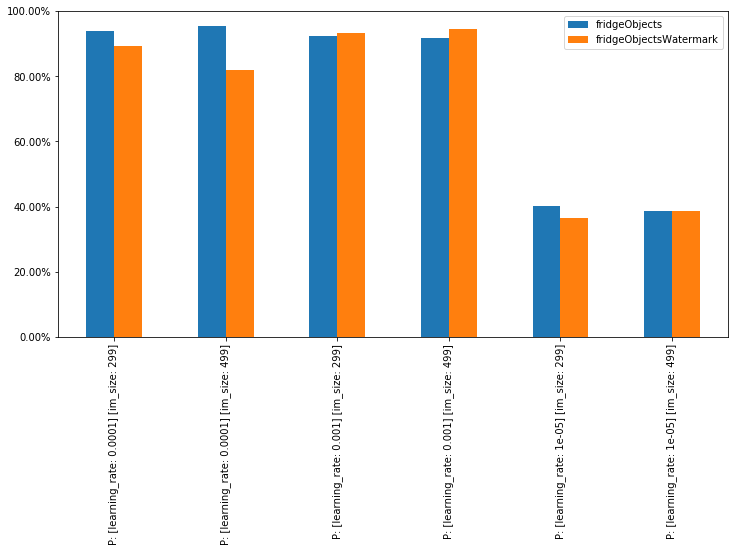

In [11]:
ax = df.mean(level=(1,2))["accuracy"].unstack().plot(kind='bar', figsize=(12, 6))
ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])

Additionally, we may want simply to see which set of hyperparameters perform the best across the different __datasets__. We can do that by averaging the results of the different datasets.

In [12]:
df.mean(level=(1)).T

,P: [learning_rate: 0.0001] [im_size: 299],P: [learning_rate: 0.0001] [im_size: 499],P: [learning_rate: 0.001] [im_size: 299],P: [learning_rate: 0.001] [im_size: 499],P: [learning_rate: 1e-05] [im_size: 299],P: [learning_rate: 1e-05] [im_size: 499]
duration,15.965834,23.071527,16.542008,23.272596,15.909339,23.212734
accuracy,0.916666,0.886364,0.928030,0.931818,0.382576,0.386364


To make it easier to see which permutation did the best, we can plot the results using the `plot_sweeper_df` helper function. This plot will help us easily see which parameters offer the highest accuracies.

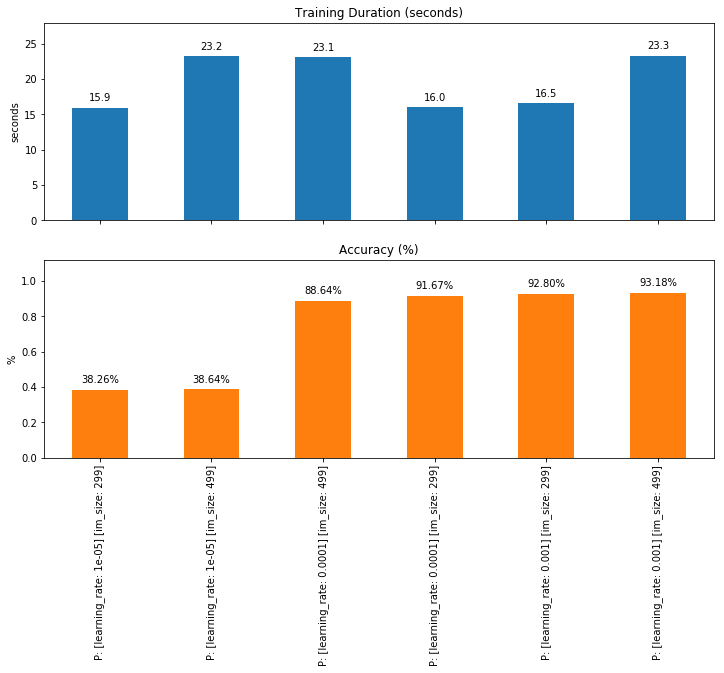

In [13]:
plot_sweeper_df(df.mean(level=(1)), sort_by="accuracy")